# Notebook Instructions

1. If you are new to Jupyter notebooks, please go through this introductory manual <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank">here</a>.<br>
If you need to set up a Python environment on your local PC, please go through the blog, [Setting Up Python On Your System](https://blog.quantinsti.com/set-up-python-system/)

### Step 1: Import the Required Libraries

In [3]:
# Machine learning classification
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.metrics import accuracy_score
# For data manipulation
import pandas as pd
import numpy as np
import yfinance as yf
# To plot
import matplotlib.pyplot as plt
import seaborn

### Step 2: Get Your Data

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


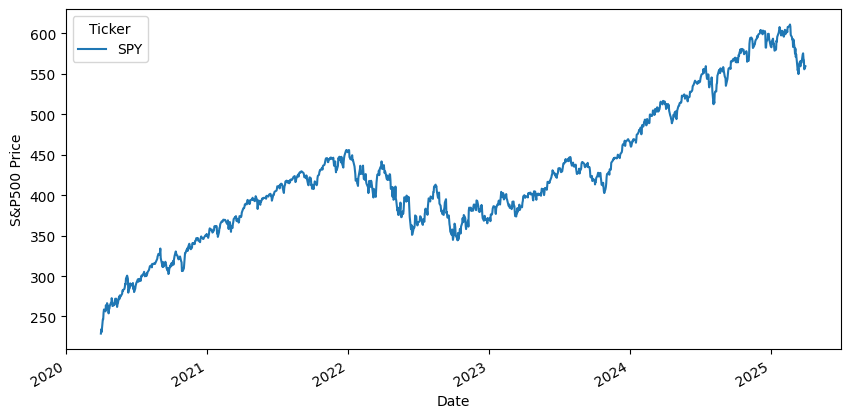

In [4]:
# Download S&P 500 ETF (SPY) data
df = yf.download('SPY', start="2020-04-01", end="2025-04-01")
df = df.dropna() # Remove any missing values
# Plot the price history
df.Close.plot(figsize=(10,5))
plt.ylabel("S&P500 Price")
plt.show()

### Step 3: Define What You Want to Predict

In [5]:
# Create our target variable:
# If tomorrow's close is higher than today's, assign 1 (buy signal)
# If lower, assign -1 (sell signal)
y = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)


### Step 4: Choose Your Prediction Features

In [6]:
# Create two simple features
df['Open-Close'] = df.Open - df.Close # Daily price change
df['High-Low'] = df.High - df.Low # Daily price range
# Select these columns as our prediction features
X = df[['Open-Close', 'High-Low']]


### Step 5: Split Data into Training and Testing Sets

In [7]:
split_percentage = 0.8
split = int(split_percentage * len(df))
# Train data set (80% of data)
X_train = X[:split]
y_train = y[:split]
# Test data set (remaining 20%)
X_test = X[split:]
y_test = y[split:]


### Step 6: Train Your Model

In [8]:
# Create and train the model
cls = SVC().fit(X_train, y_train)

C:\Users\rekhi\anaconda31\envs\quantra_py\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Step 7: Check How Well Your Model Performs

In [9]:
# Check accuracy on training and testing data
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train * 100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test * 100))


Train Accuracy: 54.98%
Test Accuracy: 58.33%


### Step 8: Make Predictions

In [10]:
# Make predictions for the entire dataset
df['Predicted_Signal'] = cls.predict(X_test)
# Calculate log returns (percentage change)
df['Return'] = np.log(df.Close.shift(-1) / df.Close) * 100
# Calculate returns based on our strategy
df['Strategy_Return'] = df.Return * df.Predicted_Signal

### Step 9: Visualise Your Results

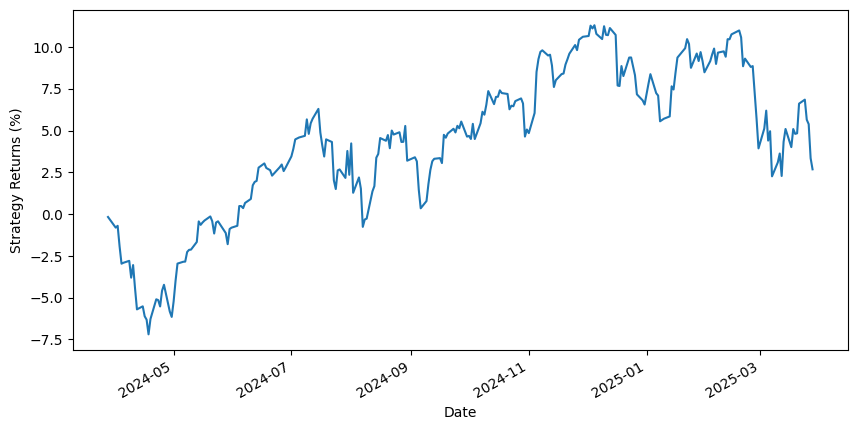

In [11]:
# Plot cumulative returns for the test period
df.Strategy_Return.iloc[split:].cumsum().plot(figsize=(10,5))
plt.ylabel("Strategy Returns (%)")
plt.show()